# **Part-4: Stages & Pipes for Landing Layers**

## **Objectives of part-4**:

* Part 4 focuses on creating stages and pipes within the landing zone.
* Verification of the S3 bucket and notification services is crucial to ensure proper setup.
* These stages and pipes will be established in the landing zone schema.

**Context Switch:**

* Change context to the landing zone schema for stage and pipe creation.

**External Stages Creation:**

* Create three external stages: delta_order_s3, delta_item_s3, and delta_customer_s3.
* Each stage corresponds to a specific delta type (order, item, customer).
* Stages are set up to point to respective folders in the S3 bucket.

In [ ]:
create stage delta_order_s3
  url= "s3://chakrabucket/delta/orders"
  comment ="feed delta order files";

create stage delta_item_s3
  url= "s3://chakrabucket/delta/item"
  comment ="feed delta item files";

create stage delta_customer_s3
  url= "s3://chakrabucket/delta/customer"
  comment ="feed delta customer files";

  show stages;

**Listing Stages:**

* Verify the created external stages.
* Confirm the presence of delta_order_s3, delta_item_s3, and delta_customer_s3 stages.

**Pipe Creation:**

* Create pipes for data ingestion using copy commands.
* Ensure each pipe has "auto_ingest" set to true for automatic data loading.
* AWS environment must be running for proper ARN number for SMS.

**Pipe Syntax and Logic:**

* Create the order pipe using the copy command, referencing delta_order_s3.
* Similar syntax applies to item and customer pipes with appropriate delta references.
* Error handling is set up to continue processing non-error records.

In [ ]:
create or replace pipe order_pipe
    auto_ingest = true
    as
        copy into landing_order from @delta_orders_s3
        file_format = (type=csv COMPRESSION=none)
        pattern='.*order.*[.]csv'
        ON_ERROR = 'CONTINUE';

In [ ]:
create or replace pipe item_pipe
        auto_ingest = true
     as
        copy into landing_item from @delta_items_s3
        file_format = (type=csv COMPRESSION=none)
        pattern='.*item.*[.]csv'
        ON_ERROR = 'CONTINUE';


In [ ]:
create or replace pipe customer_pipe
        auto_ingest = true
    as
        copy into landing_customer from @delta_customer_s3
        file_format = (type=csv COMPRESSION=none)
        pattern='.*customer.*[.]csv'
        ON_ERROR = 'CONTINUE';

**Verification of Pipes:**

* List and verify the created pipes.
* Confirm the pipes' auto_ingest status and ARN numbers.

In [ ]:
show pipes;

    select system$pipe_status('order_pipe');
    select system$pipe_status('item_pipe');
    select system$pipe_status('customer_pipe');


**S3 and Notification Verification:**

* Validate the setup in the AWS S3 bucket.
* Check the delta subfolders (customers, items, orders) to confirm data presence.

**Notification Setup:**

* Validate event notification configurations in the AWS setup.
* Review event notification triggers and SQS ARN matches.

**Validate the setup in the AWS S3 bucket.**
Check the delta subfolders (customers, items, orders) to confirm data presence.
**Notification Setup:**

* Validate event notification configurations in the AWS setup.
* Review event notification triggers and SQS ARN matches.

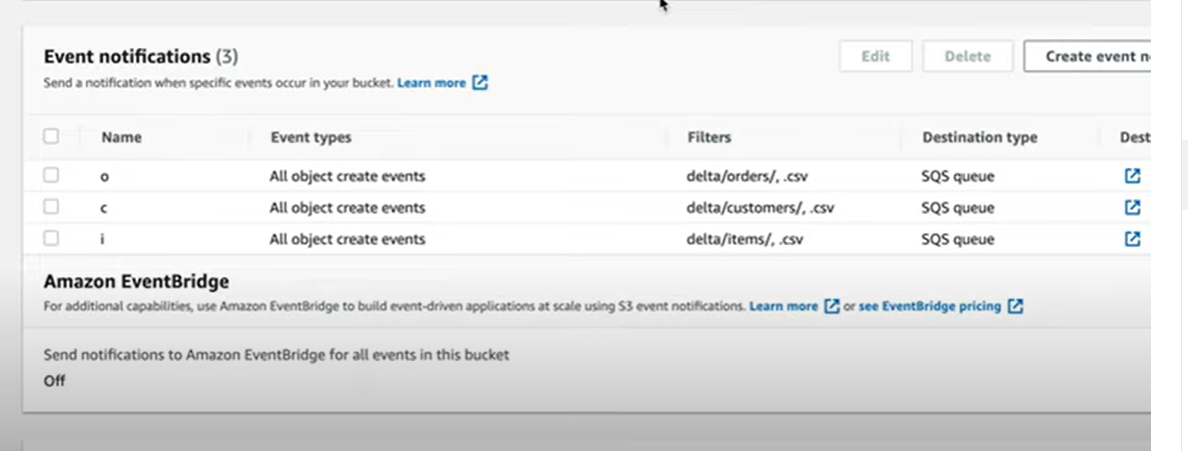

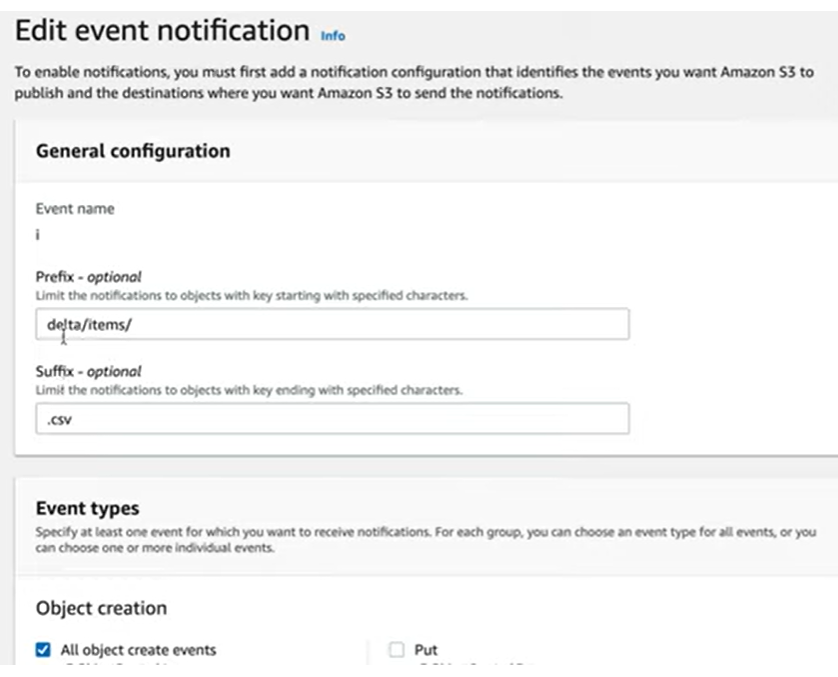

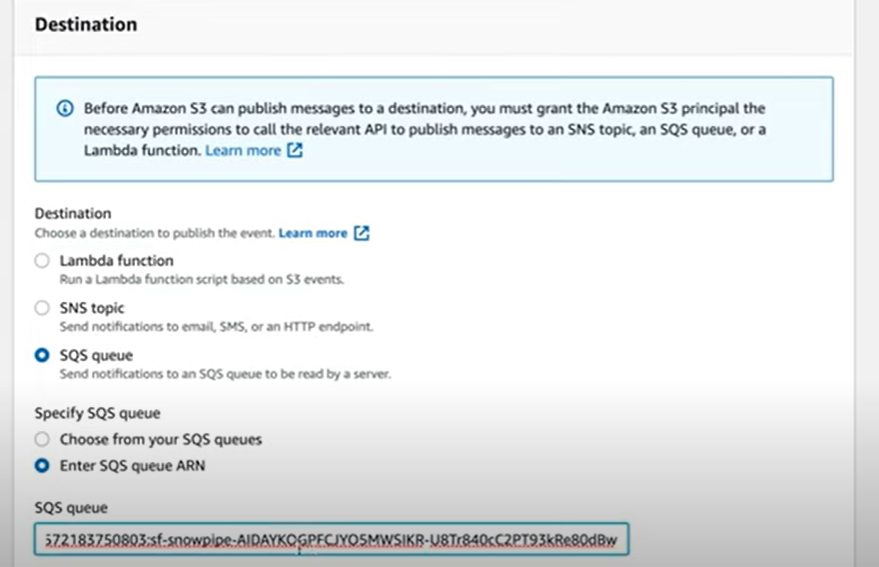



**Review the completed setup:**
* External stages pointing to S3 folders.
* Pipes established for data ingestion.
* Verification of S3 bucket folders and notification services.

**Conclusion of Part 4:**

* Part 4 successfully creates external stages and pipes.
* Stages are established for delta types, pointing to respective S3 folders.
* Pipes are set up with auto_ingest for automatic data loading.
* Verification of S3 folders and notification setup is performed.
* Part 5 will focus on creating a stream under the landing zone schema for further data processing.





